# Project Description
This code took the **4th** place in the 'KBTU Data Camp 2025'. 

The contest was held on the **kaggle** platform. 

The data was taken from there. 


*Made by Alexey V.*

# Task description
## Purpose

My task is to predict the **first aftershock** for each major earthquake in the test set. Exactly:

* **Time** : year, month, day, hour, minute, second (with milliseconds)
* **Location** : latitude and longitude (in decimal degrees)
* **Depth** : in kilometers
* **Class** : energy class (proxy for the amount or release of energy)

## Columns
**id_eq** - the unique identifier of the main earthquake

**year**, **month**, **day**, **hour**, **min**, **sec** — time of the main earthquake

**lat**, **lon** — location (latitude and longitude) of the main earthquake

**depth** — depth of the main earthquake in kilometers

**class** — energy class (magnitude index) of the main earthquake

**year_as**, **month_as**, **day_as**, **hour_as**, **min_as**, **sec_as** — time of the first aftershock

**lat_as**, **lon_as** — location (latitude and longitude) of the aftershock

**depth_as** — depth of the aftershock in kilometers

**class_as** — energy class (proxy based on magnitude) of the aftershock

 ## Tasks
 * Prepare data for training
 * Train the model
 * Predict and prepare the final data

# Table of contents

### 1. Uploading and preparing data
### 2. Model training
### 3. Visualization of the model
### 4. Prediction and preparation of the response

# 1. Uploading and preparing data

In [112]:
# Importing necessary libraries for data manipulation, machine learning, and visualization
import pandas as pd
import tensorflow as tf
import tensorflow.keras as ker
import tensorflow.keras.layers as layer
import numpy as np
import matplotlib.pyplot as plt

# Uploading CSV files with training and test earthquake data
train = pd.read_csv('E:\\Alex\\Github\\Forecast-of-Aftershocks\\train.csv')
test = pd.read_csv('E:\\Alex\\Github\\Forecast-of-Aftershocks\\test.csv')

# Displaying statistical summary of the training dataset
train.describe()


,id_eq,year,month,day,hour,min,sec,lat,lon,depth,...,year_as,month_as,day_as,hour_as,min_as,sec_as,lat_as,lon_as,depth_as,class_as
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,...,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000
mean,624.500000,1997.805600,6.443200,16.073600,11.31120,28.867200,295.345600,41.022120,76.153872,5.626400,...,1997.812000,6.438400,16.336800,11.640000,29.645600,289.813600,41.023600,76.154528,4.445600,8.298000
std,360.988227,10.869403,3.481677,8.817936,6.85092,16.829621,174.213641,1.899622,3.298428,8.839759,...,10.872756,3.484353,8.810668,6.868314,17.216513,175.463279,1.900194,3.301365,7.624536,1.350469
min,0.000000,1980.000000,1.000000,1.000000,0.00000,0.000000,0.000000,35.420000,67.150000,-1.000000,...,1980.000000,1.000000,1.000000,0.000000,0.000000,0.000000,35.440000,67.230000,-1.000000,4.000000
25%,312.250000,1988.000000,3.000000,9.000000,6.00000,14.000000,148.250000,40.080000,73.330000,-1.000000,...,1988.000000,3.000000,9.000000,6.000000,15.000000,136.500000,40.112500,73.350000,-1.000000,7.300000
50%,624.500000,1996.000000,7.000000,17.000000,11.00000,30.000000,294.500000,41.180000,76.500000,0.000000,...,1996.000000,7.000000,18.000000,12.000000,30.000000,293.500000,41.170000,76.530000,0.000000,8.100000
75%,936.750000,2010.000000,9.000000,24.000000,17.00000,44.000000,448.000000,42.157500,78.480000,10.000000,...,2010.000000,9.000000,24.000000,17.000000,44.000000,440.750000,42.157500,78.467500,10.000000,9.200000
max,1249.000000,2013.000000,12.000000,31.000000,23.00000,59.000000,598.000000,48.100000,85.320000,70.000000,...,2013.000000,12.000000,31.000000,23.000000,59.000000,600.000000,48.050000,85.400000,35.000000,15.200000


In [113]:
train

,id_eq,year,month,day,hour,min,sec,lat,lon,depth,...,year_as,month_as,day_as,hour_as,min_as,sec_as,lat_as,lon_as,depth_as,class_as
0,0,1980,2,15,9,9,350,40.54,78.31,-1,...,1980,2,15,9,45,540,40.45,78.24,-1,7.7
1,1,1980,3,16,1,44,30,41.42,75.40,-1,...,1980,3,25,10,58,236,41.40,75.42,-1,8.7
2,2,1980,7,5,20,25,220,41.46,77.30,20,...,1980,7,5,21,41,335,41.56,77.25,5,7.3
3,3,1980,8,31,23,38,372,40.52,77.46,-1,...,1980,9,4,22,56,92,40.51,77.37,-1,7.3
4,4,1980,9,4,6,47,166,44.16,79.08,10,...,1980,9,14,9,16,160,44.18,79.30,-1,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,1245,2013,12,12,0,46,471,44.12,81.18,10,...,2013,12,12,6,1,159,44.14,81.42,5,6.2
1246,1246,2013,12,18,1,44,283,41.00,78.45,15,...,2013,12,24,10,6,388,41.04,78.44,10,7.5
1247,1247,2013,12,21,14,21,464,37.12,71.31,0,...,2013,12,22,1,24,74,37.23,71.17,5,9.3
1248,1248,2013,12,22,7,45,314,38.22,72.07,20,...,2013,12,26,8,26,227,38.47,72.14,0,7.7


In [114]:
# Extracting and deleting columns from training data that are not needed in training
tra_year= train['year']
train = train.drop(columns=['year'])
tra_year_as = train['year_as']
train = train.drop(columns=['year_as'])

tra_id = train['id_eq']
train = train.drop(columns=['id_eq'])

In [115]:
#I extract non-cyclical values for subsequent normalization
other_col = train.iloc[:, 5:9]
other_col_as = train.iloc[:, 14:22]
other_col_as

,lat_as,lon_as,depth_as,class_as
0,40.45,78.24,-1,7.7
1,41.40,75.42,-1,8.7
2,41.56,77.25,5,7.3
3,40.51,77.37,-1,7.3
4,44.18,79.30,-1,7.2
...,...,...,...,...
1245,44.14,81.42,5,6.2
1246,41.04,78.44,10,7.5
1247,37.23,71.17,5,9.3
1248,38.47,72.14,0,7.7


In [116]:

# Creating cyclical (sin/cos) encodings for temporal features:
# This transforms time-related columns into a format that preserves their periodic nature,
# which helps machine learning models better learn from these features.

train['month_sin'] = np.sin(2 * np.pi * train['month'] / 12)
train['month_cos'] = np.cos(2 * np.pi * train['month'] / 12)

train['day_sin'] = np.sin(2 * np.pi * train['day'] / 31)
train['day_cos'] = np.cos(2 * np.pi * train['day'] / 31) 

train['hour_sin'] = np.sin(2 * np.pi * train['hour'] / 24)
train['hour_cos'] = np.cos(2 * np.pi * train['hour'] / 24)

train['min_sin'] = np.sin(2 * np.pi * train['min'] / 60)
train['min_cos'] = np.cos(2 * np.pi * train['min'] / 60)

train['sec_sin'] = np.sin(2 * np.pi * train['sec'] / 600)
train['sec_cos'] = np.cos(2 * np.pi * train['sec'] / 600)


train['month_as_sin'] = np.sin(2 * np.pi * train['month_as'] / 12)
train['month_as_cos'] = np.cos(2 * np.pi * train['month_as'] / 12)

train['day_as_sin'] = np.sin(2 * np.pi * train['day_as'] / 31)
train['day_as_cos'] = np.cos(2 * np.pi * train['day_as'] / 31)

train['hour_as_sin'] = np.sin(2 * np.pi * train['hour_as'] / 24)
train['hour_as_cos'] = np.cos(2 * np.pi * train['hour_as'] / 24)

train['min_as_sin'] = np.sin(2 * np.pi * train['min_as'] / 60)
train['min_as_cos'] = np.cos(2 * np.pi * train['min_as'] / 60)

train['sec_as_sin'] = np.sin(2 * np.pi * train['sec_as'] / 600)  
train['sec_as_cos'] = np.cos(2 * np.pi * train['sec_as'] / 600)


In [117]:
# Extracting all engineered cyclical time features into a separate DataFrame
train_as = train.iloc[:, 28:]
train_as

,month_as_sin,month_as_cos,day_as_sin,day_as_cos,hour_as_sin,hour_as_cos,min_as_sin,min_as_cos,sec_as_sin,sec_as_cos
0,8.660254e-01,5.000000e-01,0.101168,-0.994869,0.707107,-7.071068e-01,-1.000000,-1.836970e-16,-0.587785,0.809017
1,1.000000e+00,6.123234e-17,-0.937752,0.347305,0.500000,-8.660254e-01,-0.207912,9.781476e-01,0.621148,-0.783693
2,-5.000000e-01,-8.660254e-01,0.848644,0.528964,-0.707107,7.071068e-01,-0.913545,-4.067366e-01,-0.358368,-0.933580
3,-1.000000e+00,-1.836970e-16,0.724793,0.688967,-0.500000,8.660254e-01,-0.406737,9.135455e-01,0.821149,0.570714
4,-1.000000e+00,-1.836970e-16,0.299363,-0.954139,0.707107,-7.071068e-01,0.994522,-1.045285e-01,0.994522,-0.104528
...,...,...,...,...,...,...,...,...,...,...
1245,-2.449294e-16,1.000000e+00,0.651372,-0.758758,1.000000,6.123234e-17,0.104528,9.945219e-01,0.995562,-0.094108
1246,-2.449294e-16,1.000000e+00,-0.988468,0.151428,0.500000,-8.660254e-01,0.587785,8.090170e-01,-0.796530,-0.604599
1247,-2.449294e-16,1.000000e+00,-0.968077,-0.250653,0.258819,9.659258e-01,0.587785,-8.090170e-01,0.699663,0.714473
1248,-2.449294e-16,1.000000e+00,-0.848644,0.528964,0.866025,-5.000000e-01,0.406737,-9.135455e-01,0.692143,-0.721760


In [118]:
# Reconstructing the training dataset by combining
train = pd.concat([train[['month_sin', 'month_cos', 'day_sin', 'day_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos', 'sec_sin', 'sec_cos']], other_col], axis=1)
train = pd.concat([train, train_as], axis=1)
train = pd.concat([train, other_col_as], axis=1)
train



,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,min_sin,min_cos,sec_sin,sec_cos,...,hour_as_sin,hour_as_cos,min_as_sin,min_as_cos,sec_as_sin,sec_as_cos,lat_as,lon_as,depth_as,class_as
0,8.660254e-01,5.000000e-01,1.011683e-01,-0.994869,7.071068e-01,-7.071068e-01,0.809017,5.877853e-01,-0.500000,-0.866025,...,0.707107,-7.071068e-01,-1.000000,-1.836970e-16,-0.587785,0.809017,40.45,78.24,-1,7.7
1,1.000000e+00,6.123234e-17,-1.011683e-01,-0.994869,2.588190e-01,9.659258e-01,-0.994522,-1.045285e-01,0.309017,0.951057,...,0.500000,-8.660254e-01,-0.207912,9.781476e-01,0.621148,-0.783693,41.40,75.42,-1,8.7
2,-5.000000e-01,-8.660254e-01,8.486443e-01,0.528964,-8.660254e-01,5.000000e-01,0.500000,-8.660254e-01,0.743145,-0.669131,...,-0.707107,7.071068e-01,-0.913545,-4.067366e-01,-0.358368,-0.933580,41.56,77.25,5,7.3
3,-8.660254e-01,-5.000000e-01,-2.449294e-16,1.000000,-2.588190e-01,9.659258e-01,-0.743145,-6.691306e-01,-0.684547,-0.728969,...,-0.500000,8.660254e-01,-0.406737,9.135455e-01,0.821149,0.570714,40.51,77.37,-1,7.3
4,-1.000000e+00,-1.836970e-16,7.247928e-01,0.688967,1.000000e+00,6.123234e-17,-0.978148,2.079117e-01,0.985996,-0.166769,...,0.707107,-7.071068e-01,0.994522,-1.045285e-01,0.994522,-0.104528,44.18,79.30,-1,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,-2.449294e-16,1.000000e+00,6.513725e-01,-0.758758,0.000000e+00,1.000000e+00,-0.994522,1.045285e-01,-0.975917,0.218143,...,1.000000,6.123234e-17,0.104528,9.945219e-01,0.995562,-0.094108,44.14,81.42,5,6.2
1246,-2.449294e-16,1.000000e+00,-4.853020e-01,-0.874347,2.588190e-01,9.659258e-01,-0.994522,-1.045285e-01,0.177085,-0.984196,...,0.500000,-8.660254e-01,0.587785,8.090170e-01,-0.796530,-0.604599,41.04,78.44,10,7.5
1247,-2.449294e-16,1.000000e+00,-8.978045e-01,-0.440394,-5.000000e-01,-8.660254e-01,0.809017,-5.877853e-01,-0.989272,0.146083,...,0.258819,9.659258e-01,0.587785,-8.090170e-01,0.699663,0.714473,37.23,71.17,5,9.3
1248,-2.449294e-16,1.000000e+00,-9.680771e-01,-0.250653,9.659258e-01,-2.588190e-01,-1.000000,-1.836970e-16,-0.146083,-0.989272,...,0.866025,-5.000000e-01,0.406737,-9.135455e-01,0.692143,-0.721760,38.47,72.14,0,7.7


In [119]:
# Defining feature groups  normalized_cols and non_normalized_cols
normalized_cols = [
    'month_sin', 'month_cos', 'day_sin', 'day_cos', 
    'hour_sin', 'hour_cos', 'min_sin', 'min_cos', 
    'sec_sin', 'sec_cos', 'month_as_sin', 'month_as_cos', 
    'day_as_sin', 'day_as_cos', 'hour_as_sin', 'hour_as_cos', 
    'min_as_sin', 'min_as_cos', 'sec_as_sin', 'sec_as_cos'
]


non_normalized_cols = ['lat', 'lon', 'depth', 'class', 'lat_as', 'lon_as', 'depth_as', 'class_as']
#for future denormalized
normalization_params = {
    'lat_as': {'mean': train['lat_as'].mean(), 'std': train['lat_as'].std()},
    'lon_as': {'mean': train['lon_as'].mean(), 'std': train['lon_as'].std()},
    'depth_as': {'mean': train['depth'].mean(), 'std': train['depth_as'].std()},
    'class_as': {'mean': train['class_as'].mean(), 'std': train['class_as'].std()}
}

for col in non_normalized_cols:
    mean = train[col].mean()
    std = train[col].std()
    train[col] = (train[col] - mean) / std
train[non_normalized_cols]



,lat,lon,depth,class,lat_as,lon_as,depth_as,class_as
0,-0.253798,0.653683,-0.749613,0.934224,-0.301864,0.631700,-0.714221,-0.442809
1,0.209452,-0.228555,-0.749613,-0.696042,0.198085,-0.222492,-0.714221,0.297674
2,0.230509,0.347477,1.626017,2.564491,0.282287,0.331824,0.072713,-0.739002
3,-0.264326,0.395985,-0.749613,0.832333,-0.270288,0.368173,-0.714221,-0.739002
4,1.651845,0.887128,0.494765,1.341791,1.661094,0.952779,-0.714221,-0.813051
...,...,...,...,...,...,...,...,...
1245,1.630788,1.523795,0.494765,-0.186584,1.640043,1.594938,0.072713,-1.553534
1246,-0.011644,0.696128,1.060391,-0.594151,0.008631,0.692281,0.728490,-0.590906
1247,-2.054157,-1.468539,-0.636488,0.424766,-1.996428,-1.509839,0.072713,0.741964
1248,-1.475094,-1.238127,1.626017,-1.001717,-1.343863,-1.216021,-0.583065,-0.442809


In [120]:
# Defining inverse transformation functions:
def inverse_zscore(series, mean, std):
    return series * std + mean

def inverse_cyclic(sin_col, cos_col, period):
    angles = np.arctan2(sin_col, cos_col)
    values = (angles % (2 * np.pi)) / (2 * np.pi) * period
    return values
reversed_df = pd.DataFrame()
data = train

# Inverse normalization for spatial and target magnitude features
reversed_df['lat_as'] = inverse_zscore(train['lat_as'], **normalization_params['lat_as'])
reversed_df['lon_as'] = inverse_zscore(train['lon_as'], **normalization_params['lon_as'])
reversed_df['depth_as'] = inverse_zscore(train['depth_as'], **normalization_params['depth_as'])
reversed_df['class_as'] = inverse_zscore(train['class_as'], **normalization_params['class_as'])


# Inverse transformation of cyclical time features to recover discrete timestamp components
reversed_df['month_as'] = inverse_cyclic(data['month_as_sin'], data['month_as_cos'], 12).round().astype(int)
reversed_df['day_as'] = inverse_cyclic(data['day_as_sin'], data['day_as_cos'], 31).round().astype(int)
reversed_df['hour_as'] = inverse_cyclic(data['hour_as_sin'], data['hour_as_cos'], 24).round().astype(int)
reversed_df['min_as'] = inverse_cyclic(data['min_as_sin'], data['min_as_cos'], 60).round().astype(int)
reversed_df['sec_as'] = inverse_cyclic(data['sec_as_sin'], data['sec_as_cos'], 600).round().astype(int)

reversed_df


,lat_as,lon_as,depth_as,class_as,month_as,day_as,hour_as,min_as,sec_as
0,40.45,78.24,0.1808,7.7,2,15,9,45,540
1,41.40,75.42,0.1808,8.7,3,25,10,58,236
2,41.56,77.25,6.1808,7.3,7,5,21,41,335
3,40.51,77.37,0.1808,7.3,9,4,22,56,92
4,44.18,79.30,0.1808,7.2,9,14,9,16,160
...,...,...,...,...,...,...,...,...,...
1245,44.14,81.42,6.1808,6.2,12,12,6,1,159
1246,41.04,78.44,11.1808,7.5,12,24,10,6,388
1247,37.23,71.17,6.1808,9.3,12,22,1,24,74
1248,38.47,72.14,1.1808,7.7,12,26,8,26,227


In [121]:
# Defining input and output features for the model
input_features = ['month_sin', 'month_cos', 'day_sin', 'day_cos','hour_sin', 'hour_cos', 'min_sin', 'min_cos', 'sec_sin', 'sec_cos','lat', 'lon', 'depth', 'class']
output_features = ['month_as_sin', 'month_as_cos', 'day_as_sin', 'day_as_cos', 'hour_as_sin', 'hour_as_cos', 'min_as_sin', 'min_as_cos','sec_as_sin', 'sec_as_cos', 'lat_as', 'lon_as', 'depth_as', 'class_as']

x = train[input_features]
y = train[output_features]

# 2. Model training


In [122]:
# Preparing  dataset and building a regression neural network model
# The data is shuffled and split into training (80%) and validation (20%) sets
# The model is a feedforward neural network for multi-output regression with dropout regularization
batch = 16
data = tf.data.Dataset.from_tensor_slices((x.values, y.values)).shuffle(len(x.values))
train_size = int(len(x) * 0.8)
train_data = data.take(train_size).batch(batch)
val_data = data.skip(train_size).batch(batch)



model = ker.models.Sequential([
    layer.Input(shape=(len(input_features),)),
    layer.Dense(128, activation='relu'),
    layer.Dropout(0.2),
    layer.Dense(64, activation='relu'),
    layer.Dropout(0.2),
    layer.Dense(len(output_features), activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [123]:
# Training the model
history = model.fit(
    train_data,
    validation_data=(val_data),
    epochs=100,
    batch_size=batch,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    ]
)


Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6899 - mae: 0.6913 - val_loss: 0.5116 - val_mae: 0.6066
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5054 - mae: 0.5951 - val_loss: 0.4115 - val_mae: 0.5325
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4630 - mae: 0.5521 - val_loss: 0.3815 - val_mae: 0.4975
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4250 - mae: 0.5249 - val_loss: 0.3703 - val_mae: 0.4815
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4005 - mae: 0.5062 - val_loss: 0.3725 - val_mae: 0.4741
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3859 - mae: 0.4983 - val_loss: 0.3498 - val_mae: 0.4632
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3948 - mae: 0.5014 - val_loss: 0.3413 - val_mae: 0.4505
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3822 - mae: 0.4908 - val_loss: 0.3331 - val_mae: 0.4431
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.388

# 3. Visualization of the model


Text(0.5, 1.0, 'Training and Validation Loss')

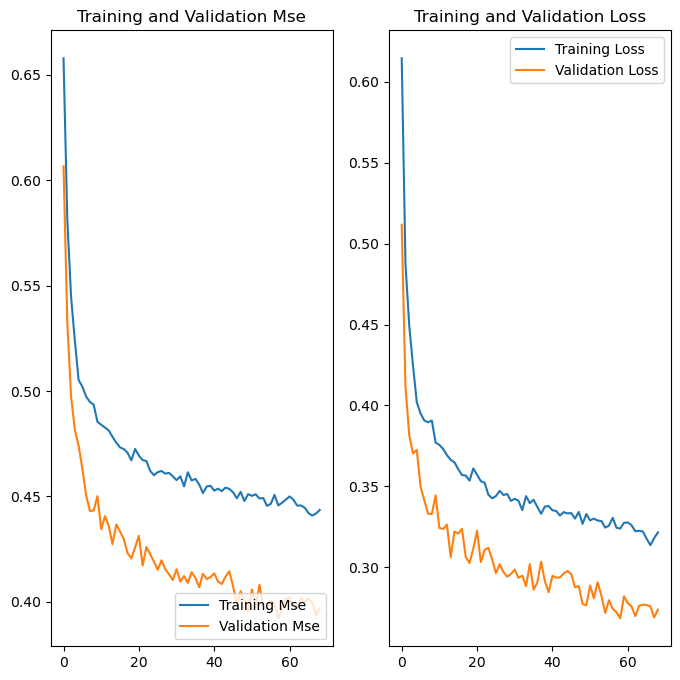

In [124]:
# Plotting the learning history using mse and mae
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']
history.history['val_mae']
epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, mae, label='Training Mse')
plt.plot(epochs_range, val_mae, label='Validation Mse')
plt.legend(loc='lower right')
plt.title('Training and Validation Mse')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [125]:
# Reversing preprocessing steps to restore original target values from model outputs

def inverse_zscore(series, mean, std):
    return series * std + mean

def inverse_cyclic(sin_col, cos_col, period):
    angles = np.arctan2(sin_col, cos_col)
    values = (angles % (2 * np.pi)) / (2 * np.pi) * period
    return values
reversed_df = pd.DataFrame()
data = train


# Reversing z-score normalization for spatial and class target values
reversed_df['lat_as'] = inverse_zscore(train['lat_as'], **normalization_params['lat_as'])
reversed_df['lon_as'] = inverse_zscore(train['lon_as'], **normalization_params['lon_as'])
reversed_df['depth_as'] = inverse_zscore(train['depth_as'], **normalization_params['depth_as'])
reversed_df['class_as'] = inverse_zscore(train['class_as'], **normalization_params['class_as'])

# Reversing cyclical encoding for time-related features
reversed_df['month_as'] = inverse_cyclic(data['month_as_sin'], data['month_as_cos'], 12).round().astype(int)
reversed_df['day_as'] = inverse_cyclic(data['day_as_sin'], data['day_as_cos'], 31).round().astype(int)
reversed_df['hour_as'] = inverse_cyclic(data['hour_as_sin'], data['hour_as_cos'], 24).round().astype(int)
reversed_df['min_as'] = inverse_cyclic(data['min_as_sin'], data['min_as_cos'], 60).round().astype(int)
reversed_df['sec_as'] = inverse_cyclic(data['sec_as_sin'], data['sec_as_cos'], 600).round().astype(int)

reversed_df


,lat_as,lon_as,depth_as,class_as,month_as,day_as,hour_as,min_as,sec_as
0,40.45,78.24,0.1808,7.7,2,15,9,45,540
1,41.40,75.42,0.1808,8.7,3,25,10,58,236
2,41.56,77.25,6.1808,7.3,7,5,21,41,335
3,40.51,77.37,0.1808,7.3,9,4,22,56,92
4,44.18,79.30,0.1808,7.2,9,14,9,16,160
...,...,...,...,...,...,...,...,...,...
1245,44.14,81.42,6.1808,6.2,12,12,6,1,159
1246,41.04,78.44,11.1808,7.5,12,24,10,6,388
1247,37.23,71.17,6.1808,9.3,12,22,1,24,74
1248,38.47,72.14,1.1808,7.7,12,26,8,26,227


In [126]:
# Making predictions on the validation set and reversing preprocessing for evaluation
x_val = x.values[train_size:] 
y_val = y.values[train_size:]

data_pred = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(batch)


predictions = model.predict(data_pred)


pred_df = pd.DataFrame(predictions, columns=y.columns)
true_df = pd.DataFrame(y_val, columns=y.columns)


reversed_df = pd.DataFrame()


for col in ['lat_as', 'lon_as', 'depth_as', 'class_as']:
    reversed_df[f'{col}_true'] = inverse_zscore(true_df[col], **normalization_params[col])
    reversed_df[f'{col}_pred'] = inverse_zscore(pred_df[col], **normalization_params[col])


cyclic_features = {
    'month_as': 12,
    'day_as': 31,
    'hour_as': 24,
    'min_as': 60,
    'sec_as': 600
}

for feature, period in cyclic_features.items():
    sin_col_true = true_df[f'{feature}_sin']
    cos_col_true = true_df[f'{feature}_cos']
    sin_col_pred = pred_df[f'{feature}_sin']
    cos_col_pred = pred_df[f'{feature}_cos']

    reversed_df[f'{feature}_true'] = inverse_cyclic(sin_col_true, cos_col_true, period).round().astype(int)
    reversed_df[f'{feature}_pred'] = inverse_cyclic(sin_col_pred, cos_col_pred, period).round().astype(int)


reversed_df.head(10)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,lat_as_true,lat_as_pred,lon_as_true,lon_as_pred,depth_as_true,depth_as_pred,class_as_true,class_as_pred,month_as_true,month_as_pred,day_as_true,day_as_pred,hour_as_true,hour_as_pred,min_as_true,min_as_pred,sec_as_true,sec_as_pred
0,41.51,41.521774,82.14,81.472076,21.1808,10.824411,8.7,8.149569,5,5,30,1,16,10,19,10,526,243
1,43.38,43.002853,77.38,77.256950,6.1808,9.583750,4.8,6.849145,6,6,4,4,0,7,25,26,36,164
2,42.30,42.122803,78.20,77.535538,6.1808,8.726105,7.1,7.176290,6,6,2,4,21,21,18,12,201,245
3,44.45,44.145710,78.56,78.497513,16.1808,10.278233,6.6,7.038427,6,6,18,15,13,8,45,31,177,225
4,37.52,37.355068,71.42,71.351570,6.1808,7.620066,8.2,8.352695,7,7,7,9,15,17,41,58,489,571
5,39.18,39.232334,73.38,73.441055,11.1808,7.444854,8.5,8.146557,7,7,6,8,10,22,54,56,8,200
6,42.12,42.187176,82.25,81.630157,16.1808,15.183713,8.4,7.724278,7,7,12,14,7,15,40,30,567,573
7,41.16,41.224552,81.27,80.541168,11.1808,10.994766,7.2,7.496888,7,7,15,14,9,14,50,19,341,560
8,44.45,43.927628,82.19,81.653175,36.1808,12.313021,7.1,7.505851,7,7,18,18,3,5,29,31,319,229
9,40.20,39.914845,71.48,72.127686,1.1808,4.753909,8.6,9.345140,7,7,19,19,19,20,57,56,209,405


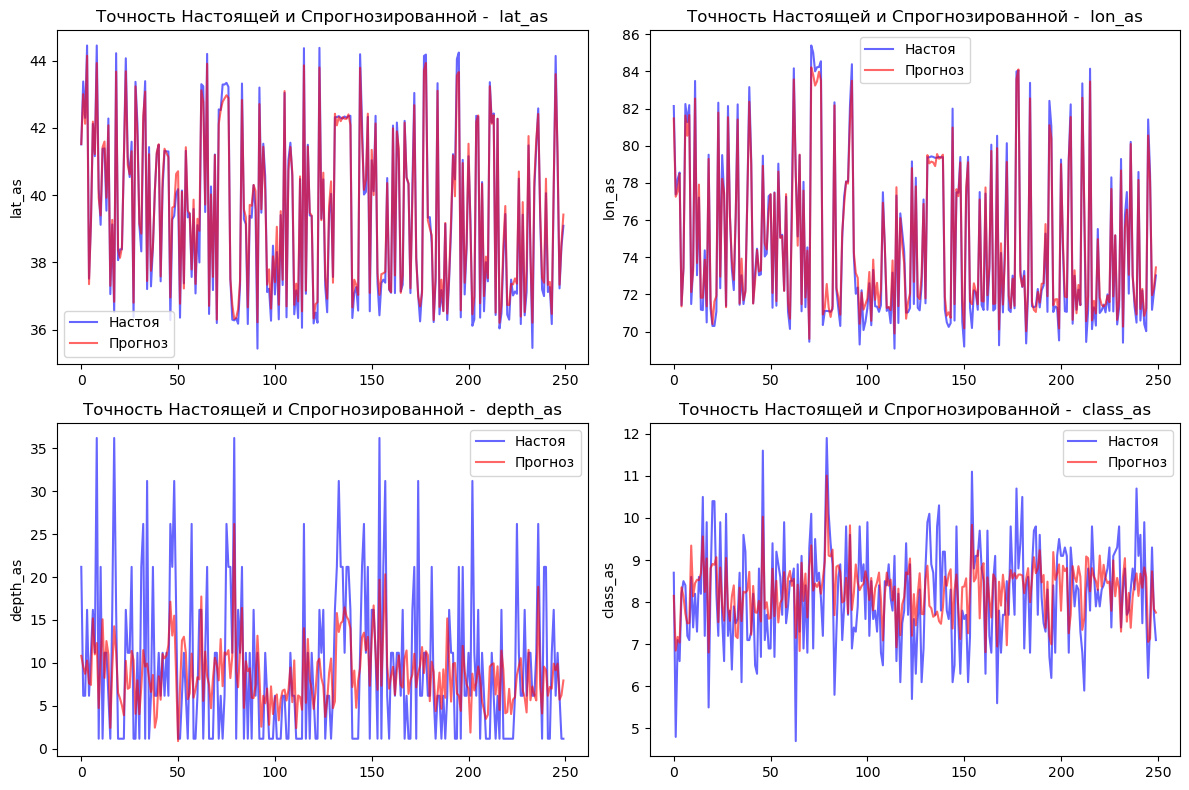

In [127]:
# Visualizing true vs predicted values for selected features
features_to_plot = ['lat_as', 'lon_as', 'depth_as', 'class_as']

plt.figure(figsize=(12, 8))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)  
    plt.plot(reversed_df[f'{feature}_true'], label='Настоя', color='blue', alpha=0.6)
    plt.plot(reversed_df[f'{feature}_pred'], label='Прогноз', color='red', alpha=0.6)
    plt.title(f'Точность Настоящей и Спрогнозированной -  {feature}')
    plt.ylabel(f'{feature}')
    plt.legend()

plt.tight_layout()
plt.show()

# 4. Prediction and preparation of the response

In [128]:
# Extracting and removing non-feature columns from the test set
tst_year= test['year']
test = test.drop(columns=['year'])

tst_id = test['id_eq']
test = test.drop(columns=['id_eq'])


In [129]:
test_col = test.iloc[:, 5:9]
test_col

,lat,lon,depth,class
0,38.46,73.45,60,10.7
1,37.22,71.06,20,10.2
2,51.05,89.48,10,10.9
3,37.18,70.45,0,11.5
4,42.27,83.46,10,11.0
...,...,...,...,...
295,38.44,70.27,10,13.4
296,37.53,71.42,25,10.2
297,37.26,71.29,5,10.7
298,37.15,71.00,10,10.3


In [130]:

#Applying cyclical encoding in the test dataset

test['month_sin'] = np.sin(2 * np.pi * test['month'] / 12)
test['month_cos'] = np.cos(2 * np.pi * test['month'] / 12)

test['day_sin'] = np.sin(2 * np.pi * test['day'] / 31)
test['day_cos'] = np.cos(2 * np.pi * test['day'] / 31)

test['hour_sin'] = np.sin(2 * np.pi * test['hour'] / 24)
test['hour_cos'] = np.cos(2 * np.pi * test['hour'] / 24)

test['min_sin'] = np.sin(2 * np.pi * test['min'] / 60)
test['min_cos'] = np.cos(2 * np.pi * test['min'] / 60)

test['sec_sin'] = np.sin(2 * np.pi * test['sec'] / 600)
test['sec_cos'] = np.cos(2 * np.pi * test['sec'] / 600)



In [131]:
test = pd.concat([test[['month_sin', 'month_cos', 'day_sin', 'day_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos', 'sec_sin', 'sec_cos']], test_col], axis=1)


In [132]:
test

,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,min_sin,min_cos,sec_sin,sec_cos,lat,lon,depth,class
0,0.866025,5.000000e-01,0.299363,-0.954139,-0.258819,0.965926,0.809017,-0.587785,-0.838671,0.544639,38.46,73.45,60,10.7
1,-0.866025,5.000000e-01,0.394356,0.918958,0.965926,-0.258819,0.994522,-0.104528,-0.944376,-0.328867,37.22,71.06,20,10.2
2,0.866025,-5.000000e-01,0.101168,-0.994869,-0.707107,-0.707107,0.809017,-0.587785,0.318959,-0.947768,51.05,89.48,10,10.9
3,0.500000,8.660254e-01,-0.848644,0.528964,-0.258819,0.965926,0.913545,-0.406737,0.998027,-0.062791,37.18,70.45,0,11.5
4,-0.866025,5.000000e-01,-0.848644,0.528964,-0.965926,-0.258819,-0.978148,0.207912,0.435231,0.900319,42.27,83.46,10,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.500000,-8.660254e-01,0.897805,-0.440394,0.500000,0.866025,0.994522,0.104528,-0.954240,-0.299041,38.44,70.27,10,13.4
296,0.866025,-5.000000e-01,-0.724793,0.688967,0.500000,-0.866025,-0.587785,0.809017,0.020942,0.999781,37.53,71.42,25,10.2
297,-0.866025,-5.000000e-01,-0.897805,-0.440394,0.866025,0.500000,-0.866025,-0.500000,0.886204,0.463296,37.26,71.29,5,10.7
298,-1.000000,-1.836970e-16,-0.394356,0.918958,-0.500000,0.866025,-0.978148,0.207912,-0.999945,-0.010472,37.15,71.00,10,10.3


In [133]:
#Normalizing non-cyclical features
non_normalized_cols = ['lat', 'lon', 'depth', 'class']
for col in non_normalized_cols:
    mean = test[col].mean()
    std = test[col].std()
    normalization_params[col] = {'mean': mean, 'std': std}
    test[col] = (test[col] - mean) / std

test


,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,min_sin,min_cos,sec_sin,sec_cos,lat,lon,depth,class
0,0.866025,5.000000e-01,0.299363,-0.954139,-0.258819,0.965926,0.809017,-0.587785,-0.838671,0.544639,-0.160475,-0.101136,2.707772,-0.374488
1,-0.866025,5.000000e-01,0.394356,0.918958,0.965926,-0.258819,0.994522,-0.104528,-0.944376,-0.328867,-0.647278,-0.671531,0.333575,-0.898492
2,0.866025,-5.000000e-01,0.101168,-0.994869,-0.707107,-0.707107,0.809017,-0.587785,0.318959,-0.947768,4.782145,3.724571,-0.259975,-0.164887
3,0.500000,8.660254e-01,-0.848644,0.528964,-0.258819,0.965926,0.913545,-0.406737,0.998027,-0.062791,-0.662981,-0.817113,-0.853524,0.463918
4,-0.866025,5.000000e-01,-0.848644,0.528964,-0.965926,-0.258819,-0.978148,0.207912,0.435231,0.900319,1.335266,2.287843,-0.259975,-0.060086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.500000,-8.660254e-01,0.897805,-0.440394,0.500000,0.866025,0.994522,0.104528,-0.954240,-0.299041,-0.168327,-0.860072,-0.259975,2.455133
296,0.866025,-5.000000e-01,-0.724793,0.688967,0.500000,-0.866025,-0.587785,0.809017,0.020942,0.999781,-0.525577,-0.585614,0.630349,-0.898492
297,-0.866025,-5.000000e-01,-0.897805,-0.440394,0.866025,0.500000,-0.866025,-0.500000,0.886204,0.463296,-0.631574,-0.616640,-0.556749,-0.374488
298,-1.000000,-1.836970e-16,-0.394356,0.918958,-0.500000,0.866025,-0.978148,0.207912,-0.999945,-0.010472,-0.674759,-0.685851,-0.259975,-0.793691


In [134]:
# Making predictions on the preprocessed test dataset using the trained model
pred = model.predict(test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [135]:
# Converting the model's predictions into a labeled data frame required for the kaggle response
pred_df = pd.DataFrame(pred, columns=[
    'month_as_sin', 'month_as_cos', 'day_as_sin', 'day_as_cos',
    'hour_as_sin', 'hour_as_cos', 'min_as_sin', 'min_as_cos',
    'sec_as_sin', 'sec_as_cos', 'lat_as', 'lon_as', 'depth_as', 'class_as'
])

pred_df

,month_as_sin,month_as_cos,day_as_sin,day_as_cos,hour_as_sin,hour_as_cos,min_as_sin,min_as_cos,sec_as_sin,sec_as_cos,lat_as,lon_as,depth_as,class_as
0,0.700918,0.398539,-0.112965,-0.689996,0.019306,0.466936,-0.173972,0.002339,0.093211,0.006281,-0.070136,-0.016890,0.669328,-0.648505
1,-0.714183,0.381410,0.512149,0.233066,0.030350,0.019398,0.116816,-0.139771,0.158818,-0.047784,-0.633417,-0.515714,0.309561,-0.080285
2,0.686676,-0.601341,-0.562445,-0.130072,-0.341594,0.108471,-0.208744,0.299014,0.309268,0.207750,4.401247,3.165898,0.145820,0.733014
3,0.598099,0.646268,-0.452759,0.486523,-0.390877,0.077401,-0.086164,-0.159743,-0.187809,0.131492,-0.579443,-0.737120,-0.154779,0.205892
4,-0.556099,0.206223,-0.303090,0.415989,-0.048787,-0.033670,0.163095,0.147735,-0.087874,0.207000,1.146577,2.119666,0.566052,-0.310630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.503627,-0.755255,0.454458,-0.427756,0.192383,0.541985,0.230821,0.047898,0.141882,-0.218807,-0.169782,-0.700009,-0.104575,0.819257
296,0.504467,-0.587615,-0.095748,0.498644,-0.102056,-0.329365,0.071944,0.210487,-0.217499,0.106768,-0.684230,-0.648676,0.261013,-0.337231
297,-0.731730,-0.457415,-0.723800,0.047943,0.129830,0.029085,0.019140,0.071394,-0.037161,0.011018,-0.601297,-0.463182,-0.109167,0.082853
298,-0.855581,-0.021636,0.153704,0.491282,-0.051825,0.081169,0.150964,-0.046759,0.193180,-0.003087,-0.698714,-0.632125,-0.002152,0.044473


In [136]:
reversed_df = pd.DataFrame()
reversed_df['lat_as'] = inverse_zscore(pred_df['lat_as'], **normalization_params['lat_as'])
reversed_df['lon_as'] = inverse_zscore(pred_df['lon_as'], **normalization_params['lon_as'])
reversed_df['depth_as'] = inverse_zscore(pred_df['depth_as'], **normalization_params['depth_as'])
reversed_df['class_as'] = inverse_zscore(pred_df['class_as'], **normalization_params['class_as'])


reversed_df['month_as'] = inverse_cyclic(pred_df['month_as_sin'], pred_df['month_as_cos'], 12).round().astype(int)
reversed_df['day_as'] = inverse_cyclic(pred_df['day_as_sin'], pred_df['day_as_cos'], 31).round().astype(int)
reversed_df['hour_as'] = inverse_cyclic(pred_df['hour_as_sin'], pred_df['hour_as_cos'], 24).round().astype(int)
reversed_df['min_as'] = inverse_cyclic(pred_df['min_as_sin'], pred_df['min_as_cos'], 60).round().astype(int)
reversed_df['sec_as'] = inverse_cyclic(pred_df['sec_as_sin'], pred_df['sec_as_cos'], 600).round().astype(int)

reversed_df


,lat_as,lon_as,depth_as,class_as,month_as,day_as,hour_as,min_as,sec_as
0,40.890327,76.098763,10.729715,7.422214,2,16,0,45,144
1,39.819984,74.451965,7.986656,8.189578,10,6,4,23,178
2,49.386826,86.606308,6.738209,9.287913,4,22,19,54,94
3,39.922550,73.721024,4.446280,8.576052,1,27,19,35,508
4,43.202320,83.152321,9.942285,7.878504,10,28,16,8,562
...,...,...,...,...,...,...,...,...,...
295,40.700981,73.843544,4.829064,9.404381,7,11,1,13,245
296,39.723431,74.013008,7.616506,7.842581,5,30,13,3,494
297,39.881020,74.625397,4.794054,8.409891,8,24,5,3,478
298,39.695911,74.067650,5.609995,8.358060,9,1,22,18,152


In [137]:
#reating the final answer DataFrame and check him
answer =pd.concat([tst_id, tst_year.rename("year_as"), reversed_df['month_as'],reversed_df['day_as'], reversed_df['hour_as'], reversed_df['min_as'], reversed_df['sec_as'], reversed_df['lat_as'],reversed_df['lon_as'],reversed_df['depth_as'],reversed_df['class_as']], axis=1)

answer.to_csv('E:\\Alex\\Github\\Forecast-of-Aftershocks\\answer.csv', index=False)

ans = pd.read_csv('E:\\Alex\\Github\\Forecast-of-Aftershocks\\answer.csv')
ans.head(10)

,id_eq,year_as,month_as,day_as,hour_as,min_as,sec_as,lat_as,lon_as,depth_as,class_as
0,996,2018,2,16,0,45,144,40.890327,76.098760,10.729715,7.422214
1,1336,2020,10,6,4,23,178,39.819984,74.451965,7.986656,8.189578
2,730,2016,4,22,19,54,94,49.386826,86.606310,6.738209,9.287913
3,696,2016,1,27,19,35,508,39.922550,73.721020,4.446280,8.576052
4,1460,2021,10,28,16,8,562,43.202320,83.152320,9.942285,7.878504
5,1636,2023,2,11,4,53,554,39.856155,74.293450,5.297670,8.312766
6,728,2016,4,13,24,35,28,39.540870,73.823450,5.511175,8.308715
7,1233,2020,1,22,5,52,173,44.827980,79.567120,9.337306,7.314241
8,914,2017,5,16,18,12,578,39.795100,74.297220,2.964192,7.963995
9,1324,2020,9,6,0,19,20,39.645630,74.018270,2.378841,8.574727
